<a href="https://colab.research.google.com/github/Amarlalsingh/FacialKeypointDetection/blob/master/FacialKeyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

from IPython.display import clear_output
from time import sleep
import os
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
train_data = pd.read_csv("drive/My Drive/facial-keypoints-detection/training.csv")
test_data = pd.read_csv("drive/My Drive/facial-keypoints-detection/test.csv")
lookid_data = pd.read_csv("drive/My Drive/facial-keypoints-detection/IdLookupTable.csv")

In [ ]:
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [ ]:
train_data.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [ ]:
train_data.fillna(method = 'ffill',inplace = True)
train_data.isnull().any().value_counts()

False    31
dtype: int64

In [ ]:
imag = []
for i in range(0,7049):
  img = train_data['Image'][i].split(' ')
  img = ['0' if x==''else x for x in img]
  imag.append(img)

In [ ]:
image_list = np.array(imag,dtype = 'float')
X_train = image_list.reshape(-1,96,96,1)

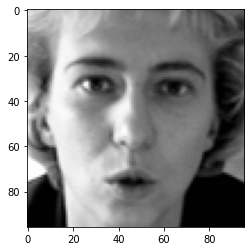

In [ ]:
plt.imshow(X_train[1].reshape(96,96),cmap = 'gray')

In [ ]:
training = train_data.drop('Image',axis = 1)

In [ ]:
y_train = []
for i in range(0,7049):
  y = training.iloc[i,:]
  y_train.append(y)
y_train = np.array(y_train,dtype = 'float')

In [ ]:
from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.models import Sequential

model = Sequential([Flatten(input_shape=(96,96)),
                         Dense(128, activation="relu"),
                         Dropout(0.1),
                         Dense(64, activation="relu"),
                         Dense(30)
                         ])

Using TensorFlow backend.


In [ ]:
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

In [ ]:
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)       

In [ ]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
model_checkpoint = ModelCheckpoint("/content/drive/My Drive/facial-keypoints-detection/model313.hdf5", monitor='mae', save_best_only=True,save_weights_only=True, verbose=1)
learning_rate_reduction = ReduceLROnPlateau(monitor='mae', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.000000000001)

In [ ]:
model.fit(X_train,y_train,epochs = 7,validation_split = 0.2, callbacks=[model_checkpoint,learning_rate_reduction])

Train on 5639 samples, validate on 1410 samples
Epoch 1/7
5639/5639 [==============================] - 554s 98ms/step - loss: 16.8957 - mae: 3.1071 - val_loss: 4.9235 - val_mae: 1.4258

Epoch 00001: mae improved from inf to 3.10713, saving model to /content/drive/My Drive/facial-keypoints-detection/model313.hdf5
Epoch 2/7
5639/5639 [==============================] - 553s 98ms/step - loss: 14.1476 - mae: 2.8350 - val_loss: 6.6565 - val_mae: 1.9398

Epoch 00002: mae improved from 3.10713 to 2.83498, saving model to /content/drive/My Drive/facial-keypoints-detection/model313.hdf5
Epoch 3/7
5639/5639 [==============================] - 555s 98ms/step - loss: 11.8190 - mae: 2.5706 - val_loss: 4.9623 - val_mae: 1.6084

Epoch 00003: mae improved from 2.83498 to 2.57062, saving model to /content/drive/My Drive/facial-keypoints-detection/model313.hdf5
Epoch 4/7
5639/5639 [==============================] - 554s 98ms/step - loss: 11.8807 - mae: 2.5833 - val_loss: 6.4088 - val_mae: 1.9412

Epoch 00

In [ ]:
model.save_weights("drive/My Drive/facial-keypoints-detection/model.h5")

In [ ]:
#preparing test data
timag = []
for i in range(0,1783):# 1783 testing images
    timg = test_data['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    timag.append(timg)


In [ ]:
#reshaping and converting the data 
timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1,96,96,1) 


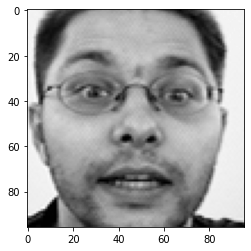

In [ ]:
# to see the first image of test dataset
plt.imshow(X_test[0].reshape(96,96),cmap = 'gray')
plt.show()


In [ ]:
#predicting our result
pred = model.predict(X_test)

In [ ]:
#Now the last step is the create our submission file keeping in the mind required format. There should be two columns :- RowId and Location Location column values should be filled according the lookup table provided ( IdLookupTable.csv)

In [ ]:
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(pred)
rowid = lookid_data['RowId']
rowid=list(rowid)
feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])
rowid = pd.Series(rowid,name = 'RowId')
loc = pd.Series(preded,name = 'Location')
submission = pd.concat([rowid,loc],axis = 1)
print(submission)
submission.to_csv('drive/My Drive/facial-keypoints-detection/res.csv',index = False)

       RowId   Location
0          1  69.958542
1          2  37.329636
2          3  28.325769
3          4  36.182400
4          5  62.830959
...      ...        ...
27119  27120  40.510612
27120  27121  47.168617
27121  27122  68.246796
27122  27123  48.360065
27123  27124  81.713707

[27124 rows x 2 columns]
